In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [9]:
data_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf")

score_df_arr = np.ndarray(shape=[4,2], dtype=pd.DataFrame)
score_df_arr[0,0] = pd.read_csv(Path(data_dir, "134_native_1_state_wxray/score_xray_0.csv"))
score_df_arr[0,1] = pd.read_csv(Path(data_dir, "143_native_1_state_2_cond_wxray/score_xray_0+xray_1.csv"))
score_df_arr[1,0] = pd.read_csv(Path(data_dir, "132_native_2_state_wxray/score_xray_0.csv"))
score_df_arr[1,1] = pd.read_csv(Path(data_dir, "133_native_2_cond_wxray/score_xray_0+xray_1.csv"))
score_df_arr[2,0] = pd.read_csv(Path(data_dir, "139_native_4_state_1_cond_wxray/score_xray_0.csv"))
score_df_arr[2,1] = pd.read_csv(Path(data_dir, "140_native_4_state_2_cond_wxray/score_xray_0+xray_1.csv"))

/var/folders/x2/ss4b83151c31mg5h31tlp3ym0000gn/T/ipykernel_61624/666621720.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


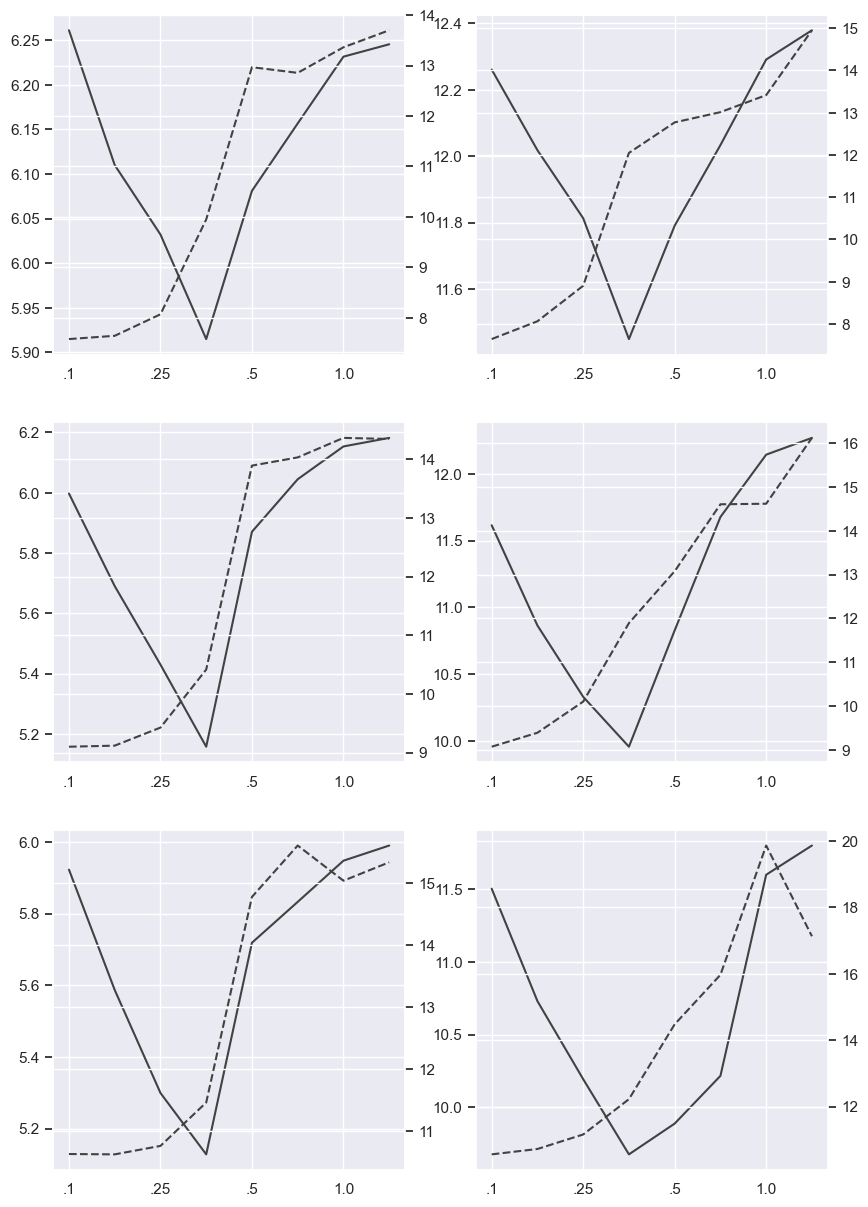

In [17]:
fig, axs = plt.subplots(3,2, figsize=(10,15))

for i in range(3):
    for j in range(2):
        score_df = score_df_arr[i,j]
        if j == 0:
            xray_field = "xray_0"
        else:
            xray_field = "xray_0+xray_1"

        ax1 = axs[i][j]
        ax2 = ax1.twinx()

        p1, = ax1.plot(score_df[xray_field], c="#424242ff", label="Likelihood")
        p2, = ax2.plot(np.log(score_df["ff"]), "--", c="#424242ff", label="FF")

        # ax1.legend(handles=[p1,p2])

        # labels = [item.get_text() for item in ax1.get_xticklabels()]
        labels = ["0", ".1", ".25", ".5", "1.0", "1.5", "2.0", "5.0", "10.0"]
        ax1.set_xticklabels(labels)

plt.savefig(Path(Path.home(), "Desktop/wxray.png"))